# Diabete ML1

## Import Pandas et le .csv

In [4]:
import pandas as pd

df = pd.read_csv("./data/test_without_class.csv")

df.head()

,ID,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,417,50,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No
1,418,55,Male,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No
2,419,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes
3,420,45,Male,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No
4,421,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No


## Vérifie si il ya des données manquantes dans certains index

In [5]:
df.isna().sum() 

ID                    0
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64

## Vérifie le type de données dans train_with_id.csv

In [6]:
df.dtypes


ID                     int64
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
dtype: object

## Nettoyage des colonnes, transforme les object en 'boolean' (int)

In [7]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map({"Yes":1,"No":0, "Male":1, "Female":0, "Positive":1, "Negative":0}) 
df.head()

,ID,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,417,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0
1,418,55,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0
2,419,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
3,420,45,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,421,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df['Age'].describe() # Détails la colonne age, pas d'incohérence

count    104.000000
mean      48.288462
std       12.263034
min       27.000000
25%       39.000000
50%       47.000000
75%       56.250000
max       90.000000
Name: Age, dtype: float64

## Corrige les index, tout en minuscule et snake_case

In [9]:
df.columns = (df
               .columns
               .str
               .replace(' ', '_')
               .str
               .lower()
               .str
               .strip())
df.columns

Index(['id', 'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')

## id en majuscule

In [14]:
df.rename(columns={'id': 'ID'}, inplace=True)
df.columns

Index(['ID', 'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')

# Supression id

In [43]:
df.drop(columns=['id'], inplace=True)
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,60,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1
1,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
2,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1
3,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
4,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


## Export en .csv vers ./data/diabetes_clean.csv

In [44]:
df.to_csv('./data/diabetes_clean.csv', index=False)
df_clean = pd.read_csv('./data/diabetes_clean.csv')
df_clean.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,60,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1
1,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
2,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1
3,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
4,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


## Ignore (seuleument pour Anna)

In [27]:
# %pip install seaborn
# %pip install matplotlib

## Visualisations exploratoires

/tmp/ipykernel_16197/290571379.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Femme', 'Homme'])
/tmp/ipykernel_16197/290571379.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_freq.values, y=symptom_freq.index, ax=axes[0, 2], palette='rocket')
/tmp/ipykernel_16197/290571379.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='class', y='age', ax=axes[1, 2], palette='Set2')
/tmp/ipykernel_16197/290571379.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe

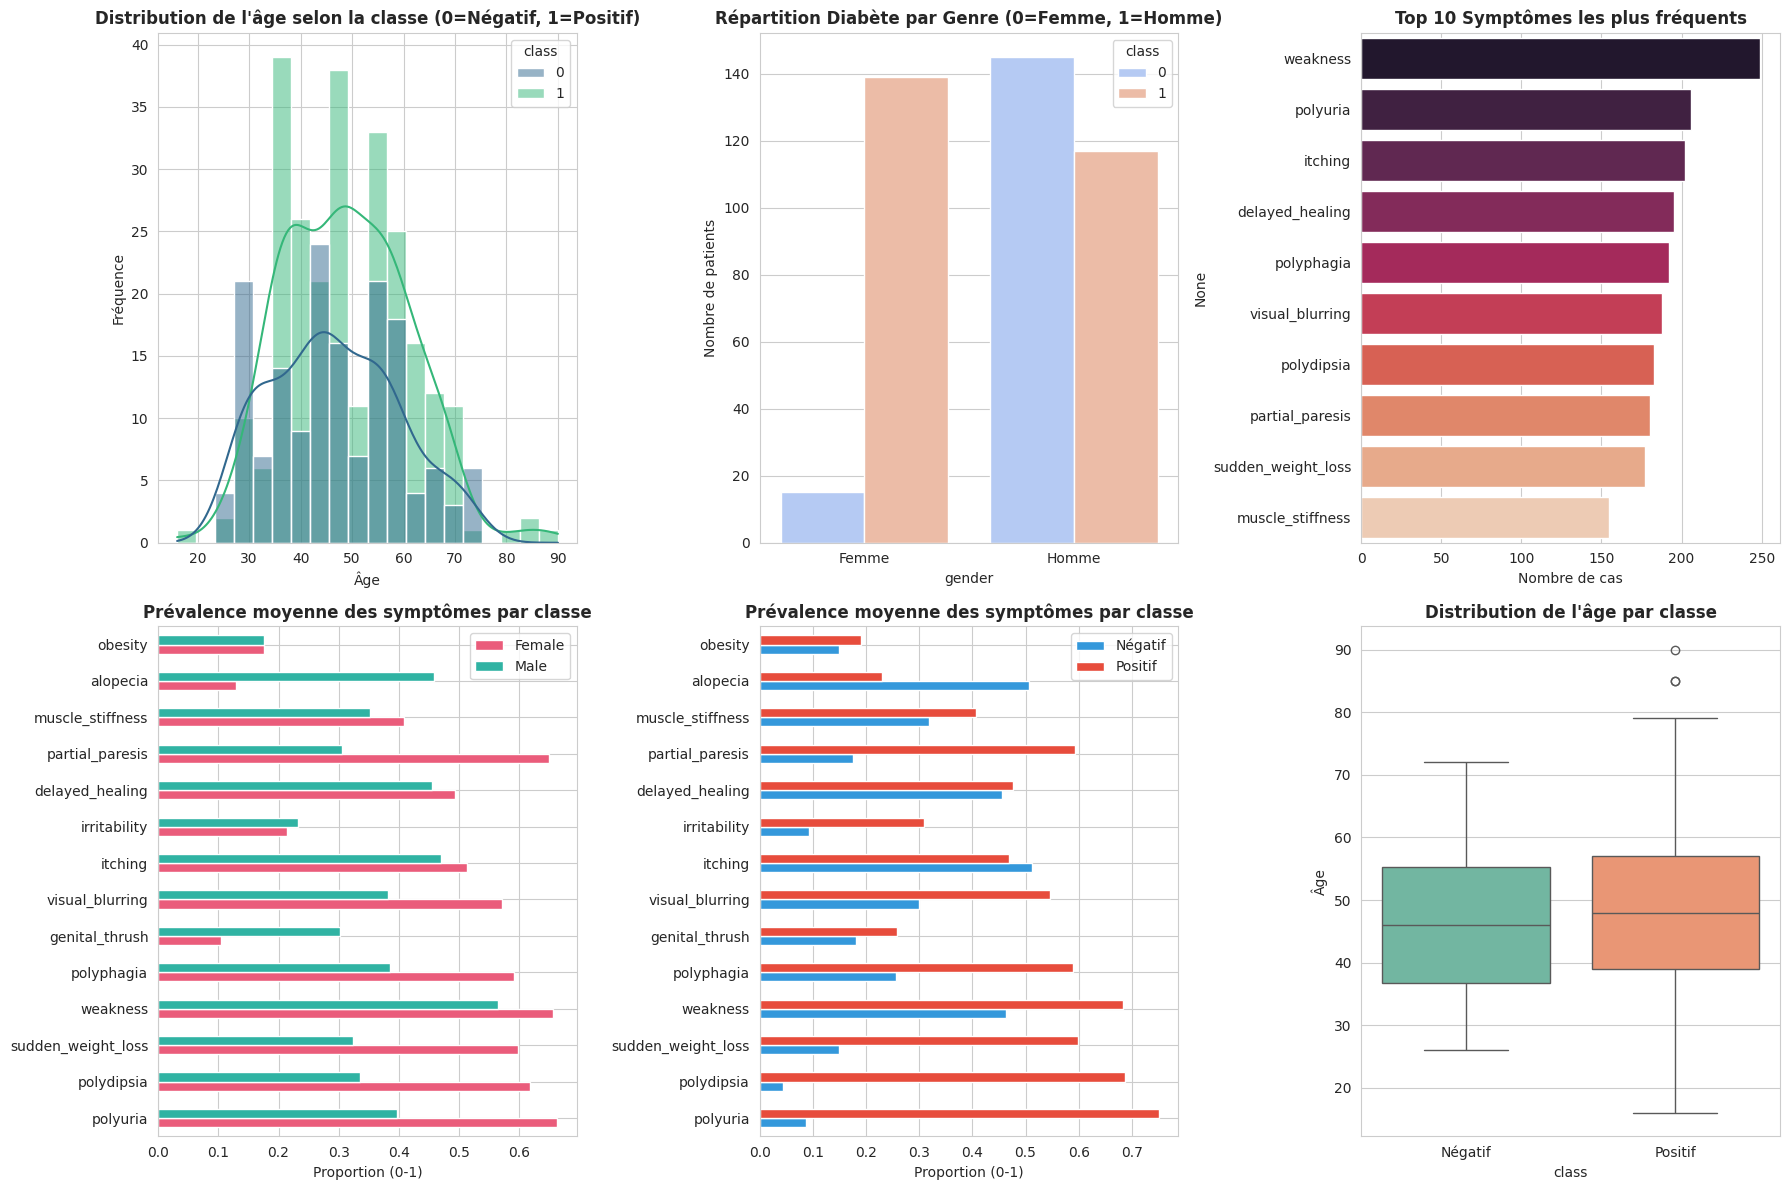

STATISTIQUES DESCRIPTIVES

Nombre total de patients : 416
Cas positifs : 256 (61.5%)
Cas négatifs : 160 (38.5%)

Âge moyen des positifs : 48.8 ans
Âge moyen des négatifs : 46.6 ans


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Créer une figure avec plusieurs subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution de l'âge selon la classe
sns.histplot(data=df_clean, x='age', hue='class', bins=20, kde=True, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title("Distribution de l'âge selon la classe (0=Négatif, 1=Positif)", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Fréquence')

# 2. Répartition des classes par genre
class_gender = df_clean.groupby(['gender', 'class']).size().reset_index(name='count')
sns.barplot(data=class_gender, x='gender', y='count', hue='class', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Répartition Diabète par Genre (0=Femme, 1=Homme)', fontsize=12, fontweight='bold')
axes[0, 1].set_xticklabels(['Femme', 'Homme'])
axes[0, 1].set_ylabel('Nombre de patients')

# 3. Top 10 symptômes les plus fréquents
symptom_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 
                'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
                'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
symptom_freq = df_clean[symptom_cols].sum().sort_values(ascending=False).head(10)
sns.barplot(x=symptom_freq.values, y=symptom_freq.index, ax=axes[0, 2], palette='rocket')
axes[0, 2].set_title('Top 10 Symptômes les plus fréquents', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Nombre de cas')

# 4. Symptôme par sexe
symptom_by_gender = df_clean.groupby('gender')[symptom_cols].mean()
symptom_by_gender.T.plot(kind='barh', ax=axes[1, 0], color=["#ea5c7b", "#30b3a3"])
axes[1, 0].set_title('Prévalence moyenne des symptômes par classe', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Proportion (0-1)')
axes[1, 0].legend(['Female', 'Male'])

# 5. Prévalence des symptômes chez les diabétiques vs non-diabétiques
symptom_by_class = df_clean.groupby('class')[symptom_cols].mean()
symptom_by_class.T.plot(kind='barh', ax=axes[1, 1], color=['#3498db', '#e74c3c'])
axes[1, 1].set_title('Prévalence moyenne des symptômes par classe', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Proportion (0-1)')
axes[1, 1].legend(['Négatif', 'Positif'])

# 6. Boxplot âge par classe
sns.boxplot(data=df_clean, x='class', y='age', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Distribution de l\'âge par classe', fontsize=12, fontweight='bold')
axes[1, 2].set_xticklabels(['Négatif', 'Positif'])
axes[1, 2].set_ylabel('Âge')

plt.tight_layout()
plt.show()

# Statistiques descriptives supplémentaires
print("=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)
print(f"\nNombre total de patients : {len(df_clean)}")
print(f"Cas positifs : {df_clean['class'].sum()} ({df_clean['class'].sum()/len(df_clean)*100:.1f}%)")
print(f"Cas négatifs : {len(df_clean) - df_clean['class'].sum()} ({(1-df_clean['class'].sum()/len(df_clean))*100:.1f}%)")
print(f"\nÂge moyen des positifs : {df_clean[df_clean['class']==1]['age'].mean():.1f} ans")
print(f"Âge moyen des négatifs : {df_clean[df_clean['class']==0]['age'].mean():.1f} ans")